<p style="color: #000000; font-size: 32px; font-weight: bold; text-align: center; margin-top: 20px;"> Megaline Tariffs
</p>
<p style="color: #000000; font-size: 24px; text-align: center; margin-bottom: 20px;">
    Ultimate vs Surf
</p>

---

**Megaline Plans**

Megaline is a telecommunications service provider. We have a selection of **500 users** for analyzing **user consumption patterns**. 

The main objective is to determine which plan generates **higher revenue** to adjust the **advertising budget**.

The plans have the following features:

| **Feature**                  | **Surf Plan**                | **Ultimate Plan**           |
|------------------------------|------------------------------|-----------------------------|
| **Monthly Payment**          | 20 dollars                   | 70 dollars                  |
| **Included Minutes**         | 500 minutes                  | 3000 minutes                |
| **Included SMS**             | 50 SMS                       | 1000 SMS                    |
| **Included Data**            | 15 GB                        | 30 GB                       |
| **Exceeding Minute Cost**    | 0.03 cents per minute        | 0.01 cents per minute       |
| **Exceeding SMS Cost**       | 0.03 cents per SMS           | 0.01 cents per SMS          |
| **Exceeding Data Cost**      | 10.00 dollars per GB         | 7.00 dollars per GB         |


Additionally, we will test two hypotheses:

**1.** Test the hypothesis that the average revenue from users of the Ultimate and Surf plans is different.

**2.** Test the hypothesis that the average revenue of users from the NY-NJ area is different from the revenue of users from other regions.

---


# 1. Dictionary of Dataset Tables

 **`Plans Table`** (Data about the plans):

- **plan_name**: Name of the plan.
- **usd_monthly_fee**: Monthly payment in US dollars.
- **minutes_included**: Minutes included per month.
- **messages_included**: SMS included per month.
- **mb_per_month_included**: Data included per month (in megabytes).
- **usd_per_minute**: Price per minute once the plan's limits are exceeded (for example, if the plan includes 100 minutes, the operator will charge for minute 101).
- **usd_per_message**: Price per SMS once the plan's limits are exceeded.
- **usd_per_gb**: Price per additional gigabyte of data once the plan's limits are exceeded (1 GB = 1024 megabytes).

**`Users Table`** (Data about the users):

- **user_id**: Unique identifier for the user.
- **first_name**: User's first name.
- **last_name**: User's last name.
- **age**: User's age (in years).
- **reg_date**: Subscription date (dd, mm, yy).
- **churn_date**: The date the user stopped using the service (if missing, the user was still active when this database was extracted).
- **city**: User's city of residence.
- **plan**: Name of the plan the user is subscribed to.


 **`Calls Table`** (Data about calls):

- **id**: Unique identifier for the call.
- **call_date**: Date of the call.
- **duration**: Duration of the call (in minutes).
- **user_id**: Identifier of the user who made the call.



 **`Messages Table`** (Data about SMS):

- **id**: Unique identifier for the SMS.
- **message_date**: Date the SMS was sent.
- **user_id**: Identifier of the user who sent the SMS.

**`Internet Table`** (Data about web sessions):

- **id**: Unique identifier for the session.
- **mb_used**: Amount of data used during the session (in megabytes).
- **session_date**: Date of the web session.
- **user_id**: Identifier of the user who initiated the session.

---

# 2. Libraries and DataFrames

In [1]:
# Importing necessary libraries
import pandas as pd # pandas for data manipulation and analysis
import numpy as np # numpy for numerical operations
import matplotlib.pyplot as plt # matplotlib for creating visualizations
import seaborn as sns # seaborn for statistical data visualization built on top of matplotlib
from scipy import stats as st # scipy for statistical functions

In [2]:
# Load the data files into DataFrames
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
plans = pd.read_csv('plans.csv')
users = pd.read_csv('users.csv')

# Verify that the DataFrames are loaded correctly and not empty
def check_data_loaded(df, name):
    if df is not None and not df.empty:
        print(f"The DataFrame {name} has been loaded successfully")
    else:
        print(f"Error: The file {name} could not be loaded or is empty.")

# Check the loading of all files
check_data_loaded(calls, 'calls')
check_data_loaded(internet, 'internet')
check_data_loaded(messages, 'messages')
check_data_loaded(plans, 'plans')
check_data_loaded(users, 'users')

The DataFrame calls has been loaded successfully
The DataFrame internet has been loaded successfully
The DataFrame messages has been loaded successfully
The DataFrame plans has been loaded successfully
The DataFrame users has been loaded successfully


# 3. Data preprocessing

Each table will be searched for null values, filled or deleted if necessary, duplicates will be checked, dtypes will be verified, and any other relevant aspects will be analyzed to improve the quality of the data before analysis.

---

## 3.1 Plans

In [3]:
# Print general information about the 'plans' DataFrame
print("General information about Plans:\n")
plans.info()
# Sample of the DataFrame
print("\nSample of 'plans' DataFrame:")
plans

General information about Plans:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes

Sample of 'plans' DataFrame:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The **'plans'** DataFrame has 8 columns and 2 rows:

All columns have 2 entries with no null values (2 non-null counts for each column).

The two adjustments will be renaming the column **'usd_monthly_pay'** to **'usd_monthly_fee'**, and converting the column **'mb_per_month_included'** to **'gb_per_month_included'**, this renamed column will represent the monthly data in gigabytes instead of megabytes.

---

### 3.1.1 Plans Data Wrangling

In [4]:
# Rename columns
plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace=True)
plans.rename(columns={'plan_name': 'plan'}, inplace=True)
plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
print("Plans columns new names:\n", plans.columns.tolist())
plans.info()

Plans columns new names:
 ['messages_included', 'gb_per_month_included', 'minutes_included', 'usd_monthly_fee', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_fee        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan                   2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Convert mb to gb 
plans['gb_per_month_included'] = plans['gb_per_month_included'] / 1024
print("Updated Plans DataFrame :")
plans.head()

Updated Plans DataFrame :


,messages_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## 3.2  Users

In [6]:
# Print general information about the 'users' DataFrame
print("General information about Users:\n")
users.info()
# Sample of the DataFrame
print("\nSample of 'users' DataFrame:")
users.sample(10)

General information about Users:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Sample of 'users' DataFrame:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
195,1195,Roy,Velez,60,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-09,surf,NaN
135,1135,Scotty,White,51,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-12-23,ultimate,NaN
263,1263,Lucio,Duffy,39,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,surf,NaN
113,1113,Spencer,Powers,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,ultimate,NaN
210,1210,Shanae,Carrillo,30,"Oklahoma City, OK MSA",2018-06-01,surf,NaN
73,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,NaN
281,1281,Zack,Hardy,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-07-23,surf,2018-11-14
132,1132,Edward,Roberts,39,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-14,ultimate,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
457,1457,Janean,Lynch,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaN


The **'users'** DataFrame has 500 rows and 8 columns:

 the **missing values** in 'churn_date mean the user was still active when this database was extracted. We will leave them as they are for the moment, and delete this column and onther unnecessary columns for analysis.

The **dtypes** are correct.

---

###  3.2.1 Users Data Wrangling

In [7]:
#Delete unnecessary columns
users = users.drop(['first_name','last_name','age','reg_date','churn_date'], axis=1)
print('Updated Users DataFrame:')
users.columns.tolist()

Updated Users DataFrame:


['user_id', 'city', 'plan']

## 3.3 Calls

In [188]:
# Print general information about the 'calls' DataFrame
print("General information about Calls:\n")
print(calls.info())
# Sample of the DataFrame
print("\nSample of 'calls' DataFrame:")
calls.sample(10)

General information about Calls:

<class 'pandas.core.frame.DataFrame'>
Index: 110901 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  int64         
 4   month      110901 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 4.7+ MB
None

Sample of 'calls' DataFrame:


,id,user_id,call_date,duration,month
137208,1498_136,1498,2018-11-13,4,11
57626,1208_8,1208,2018-12-21,2,12
120748,1421_90,1421,2018-12-23,8,12
82741,1299_399,1299,2018-07-01,8,7
121339,1427_7,1427,2018-07-07,3,7
101276,1362_11,1362,2018-01-20,9,1
85406,1313_386,1313,2018-07-17,3,7
124626,1440_142,1440,2018-12-16,16,12
75841,1268_345,1268,2018-08-15,10,8
105528,1373_8,1373,2018-11-10,11,11


The **'calls'** DataFrame has 137,735 rows and 4 columns:

The **call_date** column will be converted to datetime format, the **duration** of calls will be rounded to the nearest minute, and a **month** column will be created to represent the month of each call.

---

### 3.3.1Calls Data Wrangling

In [175]:
# Convert call_date to datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print("Dtypes of 'calls' DataFrame")
calls.dtypes

Dtypes of 'calls' DataFrame


id                   object
user_id               int64
call_date    datetime64[ns]
duration              int64
month                 int32
dtype: object

In [176]:
# Extract the month from 'call_date' and store it in a new 'month' column
calls['month'] = calls['call_date'].dt.month
print('Unique months:')
print(sorted(calls['month'].unique()))

Unique months:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [195]:
# Remove rows with call duration of 0
calls = calls[calls['duration'] != 0]
# Round the call duration up to the nearest minute and convert the dtype to integer
calls['duration'] = np.ceil(calls['duration']).astype(int)
# Confirm the dtype of the 'duration' column
print(calls.head()) 
print('\nData type of duration column after rounding and conversion:', calls['duration'].dtype)

         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27         9     12
1  1000_145     1000 2018-12-27        14     12
2  1000_247     1000 2018-12-27        15     12
3  1000_309     1000 2018-12-28         6     12
4  1000_380     1000 2018-12-30         5     12

Data type of duration column after rounding and conversion: int64


## 3.4 Messages 

In [189]:
# Print general information about the 'messages' DataFrame
print("General information about Messages:\n")
print(messages.info())
# Sample of the DataFrame
print("\nSample of 'messages' DataFrame:")
messages.sample(10)

General information about Messages:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Sample of 'messages' DataFrame:


,id,user_id,message_date
59241,1374_415,1374,2018-05-25
13688,1091_5,1091,2018-11-11
60577,1382_131,1382,2018-11-07
45848,1313_44,1313,2018-11-21
70800,1460_333,1460,2018-09-23
14813,1100_135,1100,2018-12-19
54249,1343_340,1343,2018-12-22
38894,1254_621,1254,2018-08-15
65302,1419_111,1419,2018-12-09
15681,1103_45,1103,2018-10-13


The **'messages'** DataFrame has 76,051 rows and 4 columns:

The column **'message_date'** dtype needs to be changed to **datetime**, and the **month** of the message send date will be extracted into a new column.

There are no null values.

---

### 3.4.1  Messages Data Wrangling

In [196]:
# Change message_date to datetime format
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
print("Dtypes of 'messages' DataFrame")
messages.dtypes

Dtypes of 'messages' DataFrame


id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

In [197]:
# Add month column for message_date
messages['month'] = messages['message_date'].dt.month
print('Unique months:')
print(sorted(messages['month'].unique()))

Unique months:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


## 3.5 Internet

In [191]:
# Print general information about the 'internet' DataFrame
print("General information about Internet:\n")
print(internet.info())
# Sample of the DataFrame
print("\nSample of 'messages' DataFrame:")
internet.sample(10)

General information about Internet:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

Sample of 'messages' DataFrame:


,id,user_id,session_date,mb_used
37240,1167_163,1167,2018-12-14,39.34
26585,1123_80,1123,2018-11-18,526.91
83409,1389_329,1389,2018-08-20,332.17
94873,1441_124,1441,2018-11-28,228.16
43596,1194_14,1194,2018-08-30,386.65
2376,1011_116,1011,2018-08-23,470.33
41092,1185_129,1185,2018-01-28,0.00
17435,1079_40,1079,2018-11-11,0.00
25701,1120_232,1120,2018-05-12,675.48
78708,1367_268,1367,2018-09-09,275.63


The **'internet'** DataFrame has 104,825 rows and 4 columns:

It is necessary to change the dtype of **'session_date'** to **datetime**, the **month** of consumption will be extracted, and the **consumption** will be converted to **GB**.

There are no missing values in the DataFrame.

---

### 3.5.1  Internet Data Wrangling

In [198]:
# Change session_date to datetime format
internet['session_date']  = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
print("Dtypes of 'internet' DataFrame")
internet.dtypes

Dtypes of 'internet' DataFrame


id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

In [199]:
# Add month column for session_date
internet['month'] = internet['session_date'].dt.month
print('Unique months:')
print(sorted(internet['month'].unique())) 

Unique months:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [200]:
# Convert to GB by dividing the 'gb_used' column by 1024
internet['gb_used'] = internet['mb_used']/1024
print('Updated Internet DataFrame:')
internet.head()

Updated Internet DataFrame:


,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


# 4. Data Analysis

The purpose of this step is to conduct an in-depth analysis of the processed data to uncover meaningful insights:
- **4.1 Study Plan Conditions**: Examining the conditions and details of each plan, possibly focusing on what each plan offers and how these features align with user needs.
- **4.2 Aggregate Data per User**: Summarizing data for each user across various dimensions, such as total calls, messages, and internet usage.
- **4.3 User Behavior Analysis** : Studying users' interaction patterns with the services, like how often they call, message, or use data.
- **4.4 Revenue**: Analyzing revenue generation per user or plan to identify profitable customer segments or high-value plans.


**Study plan conditions**:

In [210]:
print('Plan conditions:')
plans

Plan conditions:


,messages_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## 4.1 Aggregate data per user

In [211]:
# Calculate the number of calls made by each user per month
monthly_calls_user = calls.groupby(['user_id', 'month'])['id'].count().reset_index()

# Rename the 'id' column to 'num_calls'
monthly_calls_user.rename(columns={'id': 'call_count'}, inplace=True)
print('Call count by each user per month:')

monthly_calls_user.head()

Call count by each user per month:


,user_id,month,call_count
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49


In [212]:
# Calculate the amount of minutes spent by each user per month
monthly_minutes_user = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
print('Total of minutes spent by each user per month:')
monthly_minutes_user.head()

Total of minutes spent by each user per month:


,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [213]:
# Calculate the number of messages sent by each user per month. 
monthly_messages_user = messages.groupby(['user_id', 'month']).size().reset_index(name='message_count')
print('Monthly messages sent by each user:')
monthly_messages_user.head()

Monthly messages sent by each user:


,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [214]:
# Calculate the volume of internet traffic used by each user per month
monthly_gb_user = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
# Round up the GB used values 
monthly_gb_user['gb_used'] = monthly_gb_user['gb_used'].apply(np.ceil)
print('Rounded GB used by each user per month:')
monthly_gb_user.head()


Rounded GB used by each user per month:


,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


**Create `billing` DataFrame** with the necessary adjustments to perform the stipulated data analysis:

In [215]:
# Merge monthly_calls_user and monthly_minutes_user
billing = pd.merge(monthly_calls_user, monthly_minutes_user, on=['user_id', 'month'], how='outer')

# Merge the result with monthly_messages_user
billing = pd.merge(billing, monthly_messages_user, on=['user_id', 'month'], how='outer')

# Merge with monthly_gb_user
billing = pd.merge(billing, monthly_gb_user, on=['user_id', 'month'], how='outer')

# Merge with users dataframe
billing = pd.merge(billing, users, on='user_id',  how='outer')

# Rename the column 'duration' to 'minutes'
billing.rename(columns={'duration': 'minutes'}, inplace=True)

# Change 'month' column to datetime format
billing['month'] = pd.to_datetime(billing['month'], format='%m')

# Convert the 'month' column to full month names
billing['month'] = billing['month'].dt.month_name()

# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'month' column to a categorical type with the defined order
billing['month'] = pd.Categorical(billing['month'], categories=month_order, ordered=True)

# Function to group cities from NY and NJ as 'NY-NJ' and others as 'others'
def region(city):
    if 'NY' in city or 'NJ' in city:
        return 'NY-NJ'
    return 'others'
# Apply the function to the 'city' column of the 'users' DataFrame
users['region'] = users['city'].apply(region)

# Merge with users DataFrame to add region information
billing = pd.merge(billing, users[['user_id', 'region']], on='user_id', how='outer')

# Sort the DataFrame by the 'month' column to ensure correct order in outputs
billing = billing.sort_values('month').reset_index(drop=True)

# Billing DataFrame
print('Billing DataFrame:')
billing.head(10)

Billing DataFrame:


,user_id,month,call_count,minutes,message_count,gb_used,city,plan,region_x,region_y
0,1042,January,14.0,114.0,NaN,2.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",surf,NY-NJ,NY-NJ
1,1185,January,18.0,181.0,NaN,7.0,"Louisville/Jefferson County, KY-IN MSA",ultimate,others,others
2,1077,January,33.0,290.0,37.0,11.0,"Charlotte-Concord-Gastonia, NC-SC MSA",ultimate,others,others
3,1362,January,34.0,292.0,21.0,8.0,"Denver-Aurora-Lakewood, CO MSA",surf,others,others
4,1214,January,2.0,16.0,2.0,2.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,others,others
5,1196,January,32.0,287.0,23.0,9.0,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,others,others
6,1498,February,28.0,244.0,NaN,20.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,NY-NJ,NY-NJ
7,1077,February,84.0,776.0,67.0,20.0,"Charlotte-Concord-Gastonia, NC-SC MSA",ultimate,others,others
8,1362,February,88.0,811.0,58.0,11.0,"Denver-Aurora-Lakewood, CO MSA",surf,others,others
9,1359,February,32.0,266.0,NaN,20.0,"Colorado Springs, CO MSA",surf,others,others


In [217]:
def calculate_revenue(row):
    # Surf Plan Details
    surf = {
        "monthly_fee": 20,
        "included_minutes": 500,
        "included_sms": 50,
        "included_data": 15,
        "minute_cost": 0.03,
        "sms_cost": 0.03,
        "data_cost": 10
    }
    
    # Ultimate Plan Details
    ultimate = {
        "monthly_fee": 70,
        "included_minutes": 3000,
        "included_sms": 1000,
        "included_data": 30,
        "minute_cost": 0.01,
        "sms_cost": 0.01,
        "data_cost": 7
    }
    
    # Select plan details based on the user's plan
    if row['plan'] == 'surf':
        plan = surf
    else:  # Assume 'Ultimate Plan' for all other cases
           plan = ultimate
    
    # Base revenue is the monthly plan fee
    revenue = plan['monthly_fee']
    
    # Calculate exceeding charges for minutes, messages, and data
    # Minutes exceeding the included amount
    if row['minutes'] > plan['included_minutes']:
        revenue += (row['minutes'] - plan['included_minutes']) * plan['minute_cost']
    
    # Messages exceeding the included amount
    if row['message_count'] > plan['included_sms']:
        revenue += (row['message_count'] - plan['included_sms']) * plan['sms_cost']
    
    # Data exceeding the included amount
    if row['gb_used'] > plan['included_data']:
        revenue += (row['gb_used'] - plan['included_data']) * plan['data_cost']
    
    return revenue

# Apply the revenue calculation to each row in the DataFrame
billing['revenue'] = billing.apply(calculate_revenue, axis=1)

# Print the updated DataFrame with the new 'revenue' column
print('Monthly billing:')
billing[['user_id', 'month', 'plan', 'revenue']].sample(10)

Monthly billing:


,user_id,month,plan,revenue
2260,1297,December,surf,20.00
206,1068,May,surf,20.00
309,1041,June,ultimate,70.00
393,1440,July,surf,45.28
1097,1080,October,surf,170.27
976,1061,September,ultimate,70.00
1091,1079,October,surf,47.59
402,1311,July,ultimate,70.00
2037,1008,December,ultimate,70.00
2120,1353,December,surf,20.00


## 4.2  User Behavior Analysis 

### 4.2.1  Calls

#### 4.2.1.1 Average call duration for each plan and each month

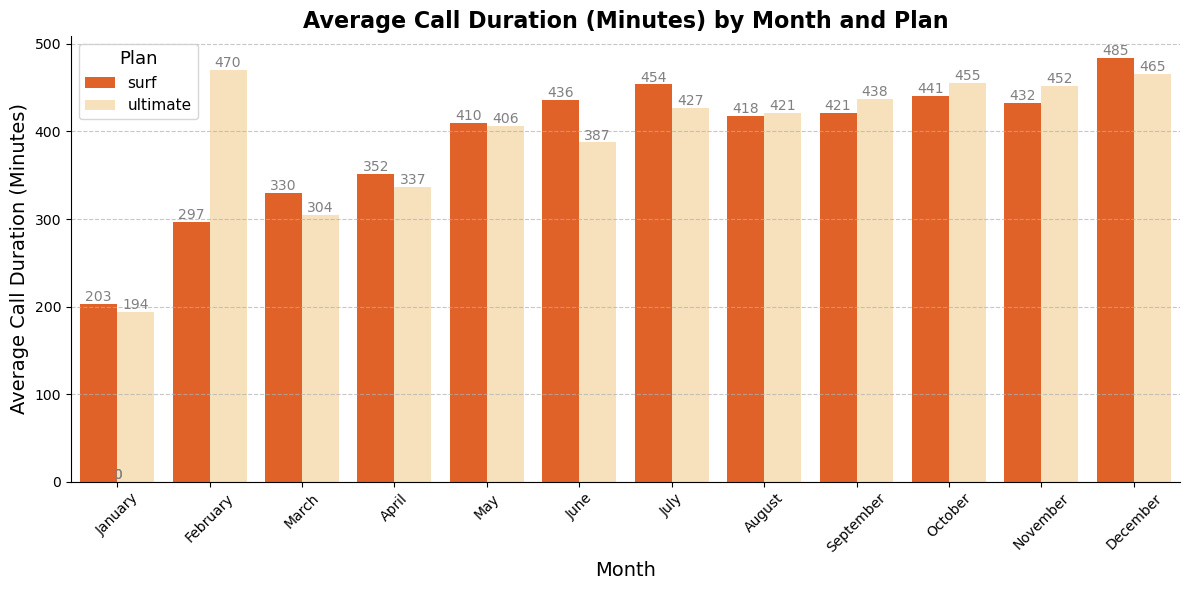

In [219]:
# Calculate the average number of minutes for each plan per month
monthly_avg_minutes = billing.groupby(['plan', 'month'], observed=False)['minutes'].mean().reset_index()

# Dictionary for plan colors
plan_colors = {
    'surf': '#fe570a',      
    'ultimate': '#ffe4b3'   
}

# Bar plot for average minutes by month and plan
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=monthly_avg_minutes, x='month', y='minutes', hue='plan', palette=plan_colors)

# Add title and labels
plt.title('Average Call Duration (Minutes) by Month and Plan', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Call Duration (Minutes)', fontsize=14)

# Rotate month names for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Plan', title_fontsize='13', fontsize='11')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the average values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='grey', 
                xytext=(0, 5), textcoords='offset points')

# Remove the top and right borders
sns.despine()

# Show plot
plt.tight_layout()
plt.show()


**Analysis of 'Average Call Duration by Plan and Month'**

The bar chart shows the **average call duration (in minutes) by plan and month** for two plans: **Surf** vs **Ultimate**.

**January to December Trends**:
   - **Call duration** generally increases over the year, with peak averages in December for both plans.
   
**Plan Comparison**:
   - **Surf** plan shows slightly higher call durations in some months, like May and October.
   - **Ultimate** plan has higher averages in February, March, and September, indicating varying usage patterns by plan.

**Highest and Lowest Call Durations**:
   - **Highest**: December (Surf at 484.5 minutes, Ultimate at 465.3 minutes).
   - **Lowest**: January (Ultimate at 193.5 minutes, Surf at 203 minutes).

**Notable Patterns**:
   - **Rising Call Durations**: Call durations generally increase throughout the year.
   - **Alternating Leads**: The Surf and Ultimate plans take turns having higher call durations each month.
   - **Small Differences**: In most months, the difference between plans is not very large.
   - **Significant Growth**: Both plans more than double their average call duration from January to December.
   - **Stable Increase**: After February, the call durations steadily grow with few drops.

**Business Insights**:
   - **Longer Calls Over Time**: Users are making longer calls as the year goes on.
   - **Similar Patterns**: Both plans show similar behavior, indicating that customers use them in comparable ways.
   - **February Spike**: The sudden rise in call duration for the Ultimate plan in February might need further analysis.
   - **No Clear Leader**: Both plans are competitive, with no single plan consistently leading in usage.


In [115]:
# Sort the DataFrame by the 'month' column to ensure correct order
monthly_users_msg = billing.groupby('month', observed=True)['user_id'].count()

# Display the updated DataFrame
print("Monthly User Count:\n", monthly_users_msg)

Monthly User Count:
 month
January        6
February      16
March         35
April         71
May          106
June         144
July         180
August       233
September    280
October      343
November     410
December     469
Name: user_id, dtype: int64


**The observed increase in consumption across both plans is primarily driven by the growth in the number of users**. Throughout the year, the company experienced an influx of new users, contributing to the rise in usage. By the end of the year, however, the number of users seems to stabilize, suggesting that the company has consolidated a steady customer base.

#### 4.2.1.2 Monthly minutes distribution by plan

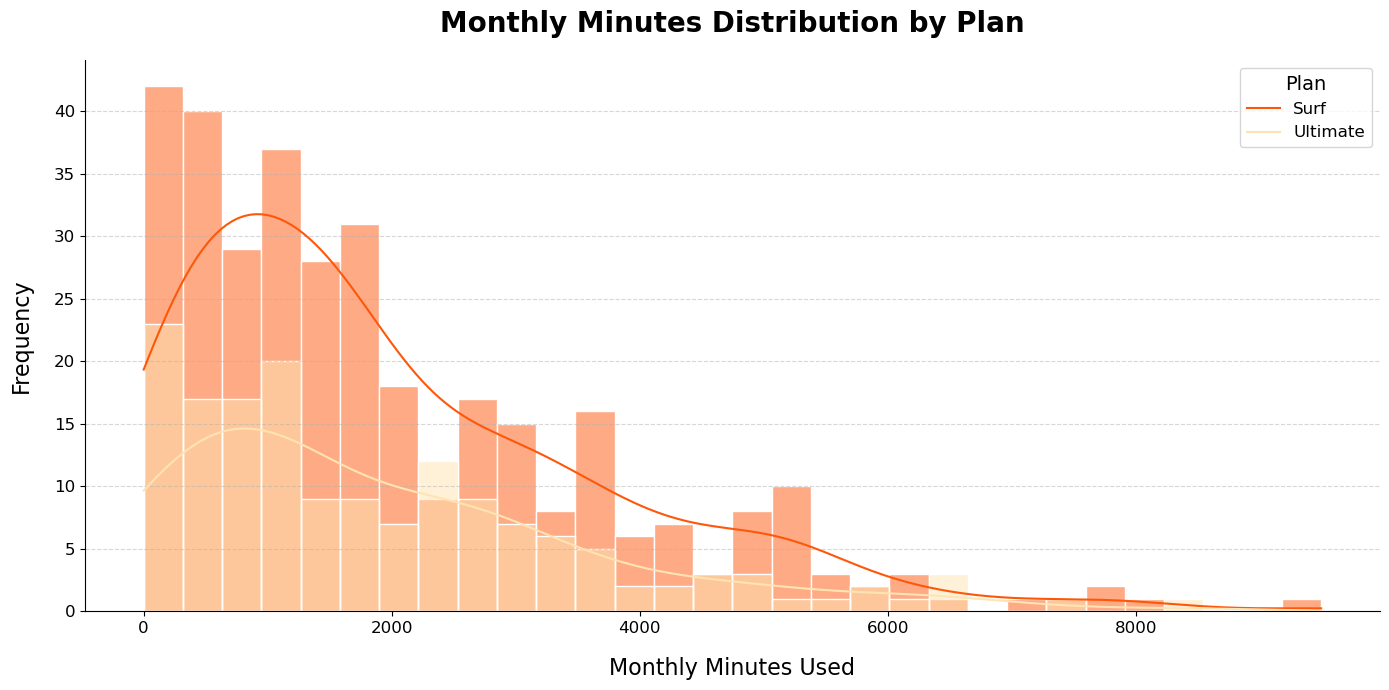

In [116]:
# Compare the monthly minutes used by users of each plan. Plot a histogram.
monthly_minutes_per_user = billing.groupby(['user_id', 'plan'])['minutes'].sum().reset_index()
#print('Monthly minutes used by users of each plan:')
#print(monthly_minutes_per_user.head())

# Comparative plot of monthly minutes used by users of each plan
plt.figure(figsize=(14, 7))  # Increased figure size for better readability
sns.histplot(data=monthly_minutes_per_user, x='minutes', hue='plan', bins=30, kde=True, palette=plan_colors, edgecolor='white')

# Title and labels
plt.legend(title='Plan', labels=['Surf', 'Ultimate'], title_fontsize=14, fontsize=12, loc='upper right')
plt.title('Monthly Minutes Distribution by Plan', fontsize=20, weight='bold', pad=20)
plt.xlabel('Monthly Minutes Used', fontsize=16, labelpad=15)
plt.ylabel('Frequency', fontsize=16, labelpad=15)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Lighter gridlines for better focus on data

# Add a border
sns.despine()

plt.tight_layout()
plt.show()

**Analysis of 'Monthly Minutes Distribution by Plan'**

**Peak Usage**:
- Highest concentration around 1000 minutes for both plans
- Surf plan has more users overall

**Distribution Pattern**:
- Most users fall between 0-2000 minutes
- Sharp decline after 2000 minutes
- Very few users exceed 6000 minutes

**Key Difference**:
- Surf (green) consistently shows higher user numbers
- Ultimate (blue) has lower frequency at all usage levels

**Most customers are moderate users (0-2000 minutes)**, with Surf being the more popular plan, and very few heavy users exist in either plan.

---

####  4.2.1.3 Monthly call duration by plan 

In [117]:
# Calculate the mean, variance, and standard deviation of monthly call duration for each plan
monthly_stats = billing.groupby(['plan', 'month'], observed=True)['minutes'].agg(['mean', 'var', 'std']).reset_index()
# Apply np.ceil to round up the values
monthly_stats['mean'] = np.ceil(monthly_stats['mean'])
monthly_stats['var'] = np.ceil(monthly_stats['var'])
monthly_stats['std'] = np.ceil(monthly_stats['std'])
print("Monthly Call Duration Statistics by Plan (rounded up):\n")
print(monthly_stats)

# Calculate the mean, variance, and standard deviation of anual call duration for each plan
anual_stats = billing.groupby(['plan'], observed=True)['minutes'].agg(['mean', 'var', 'std']).reset_index()
# Apply np.ceil to round up the values
anual_stats['mean'] = np.ceil(anual_stats['mean'])
anual_stats['var'] = np.ceil(anual_stats['var'])
anual_stats['std'] = np.ceil(anual_stats['std'])
print("\nAnual Call Duration Statistics by Plan (rounded up):\n")
print(anual_stats)

Monthly Call Duration Statistics by Plan (rounded up):

        plan      month   mean      var    std
0       surf    January  203.0  15842.0  126.0
1       surf   February  297.0  52227.0  229.0
2       surf      March  330.0  35810.0  190.0
3       surf      April  352.0  50867.0  226.0
4       surf        May  411.0  56939.0  239.0
5       surf       June  436.0  44095.0  210.0
6       surf       July  454.0  59803.0  245.0
7       surf     August  418.0  52123.0  229.0
8       surf  September  421.0  44580.0  212.0
9       surf    October  441.0  48700.0  221.0
10      surf   November  433.0  48749.0  221.0
11      surf   December  485.0  59883.0  245.0
12  ultimate    January  194.0  16573.0  129.0
13  ultimate   February  471.0  54346.0  234.0
14  ultimate      March  305.0  61985.0  249.0
15  ultimate      April  337.0  34889.0  187.0
16  ultimate        May  407.0  43842.0  210.0
17  ultimate       June  388.0  37903.0  195.0
18  ultimate       July  428.0  72564.0  270.0
19  

**Anlysis of 'Monthly Call Duration Statistics by Plan'**

- **Average Call Duration**: Both plans have similar averages—**437 minutes** for "surf" and **435 minutes** for "ultimate".
- **Variance**: The "ultimate" plan has slightly higher variance, indicating more fluctuation in call durations.
- **Standard Deviation**: The "ultimate" plan also has a higher standard deviation (**238 minutes** vs. **230 minutes**), meaning call durations are more spread out for "ultimate" users.

**Overall**: 

**Average**: Call durations increase throughout the year with some fluctuations, and the two plans perform similarly with minor variations month to month.

**Variance**: Ultimate plan users show more variability in their calling patterns compared to Surf users, with both plans having their most consistent usage in January and most variable usage in mid-year months.

---

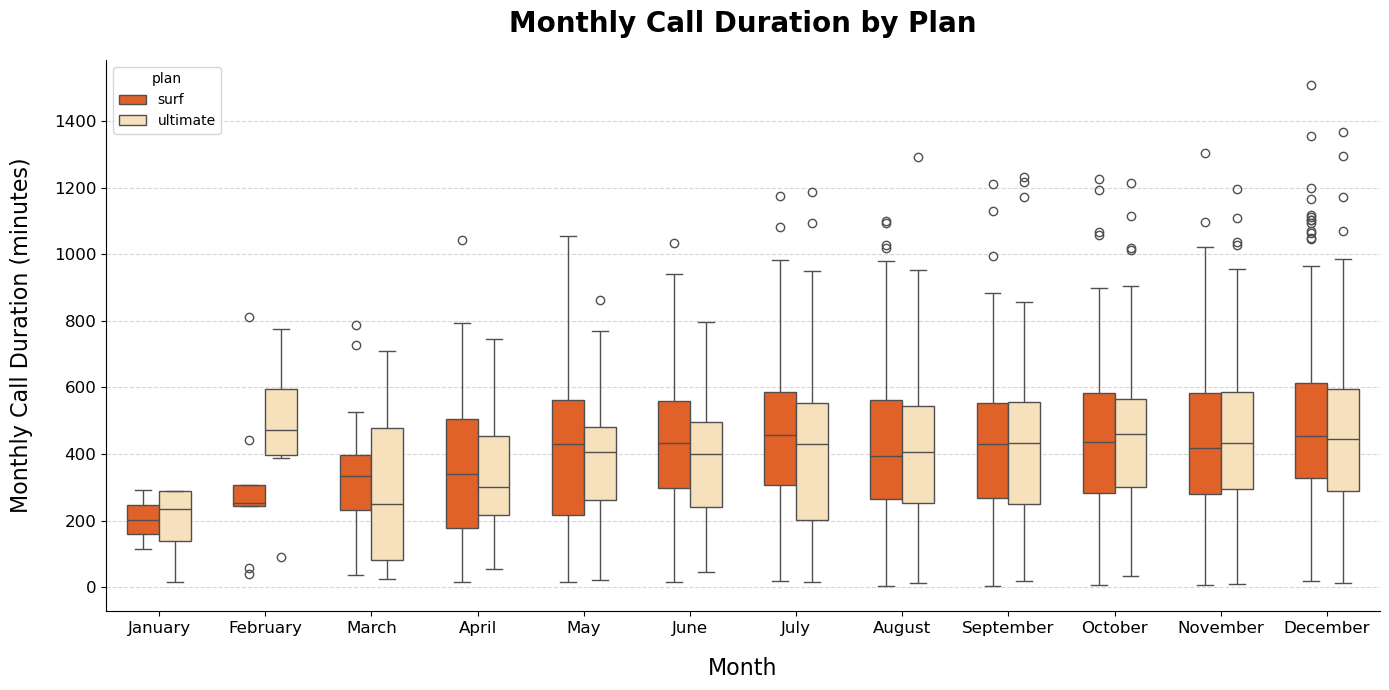

In [118]:
# Plotting a boxplot to visualize the distribution of monthly call duration (minutes)
plt.figure(figsize=(14, 7))  # Adjust figure size for better readability

# Create the boxplot: x = month, y = minutes, hue = plan (to separate by plan)
sns.boxplot(data=billing, x='month', y='minutes', hue='plan', palette=plan_colors, width=0.6)

# Title and labels
plt.title('Monthly Call Duration by Plan', fontsize=20, weight='bold', pad=20)
plt.xlabel('Month', fontsize=16, labelpad=15)
plt.ylabel('Monthly Call Duration (minutes)', fontsize=16, labelpad=15)
plt.xticks(fontsize=12)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=12)  # Adjust font size for y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Lighter gridlines for better focus on data

# Add a border
sns.despine()

plt.tight_layout()
plt.show()

**Analysis of 'Monthly Call Duration by Plan'**: 

**Overall Trend**:
- Call durations increase from January to December
- Both plans start around 200 minutes and end around 600 minutes
- More outliers (circles) appear in later months
- Ultimate (blue) and Surf (green) show similar patterns
- Boxes often overlap, suggesting similar usage patterns
- Both plans show increasing median values over time

**Key Patterns**:
- January: Lowest median and smallest spread for both plans
- February: Ultimate plan shows high variability
- Mid-year: Both plans stabilize with similar medians
- December: Highest medians and most outliers

---

###  4.2.2 Messages

####  4.2.2.1 Average number of messages for each plan per month

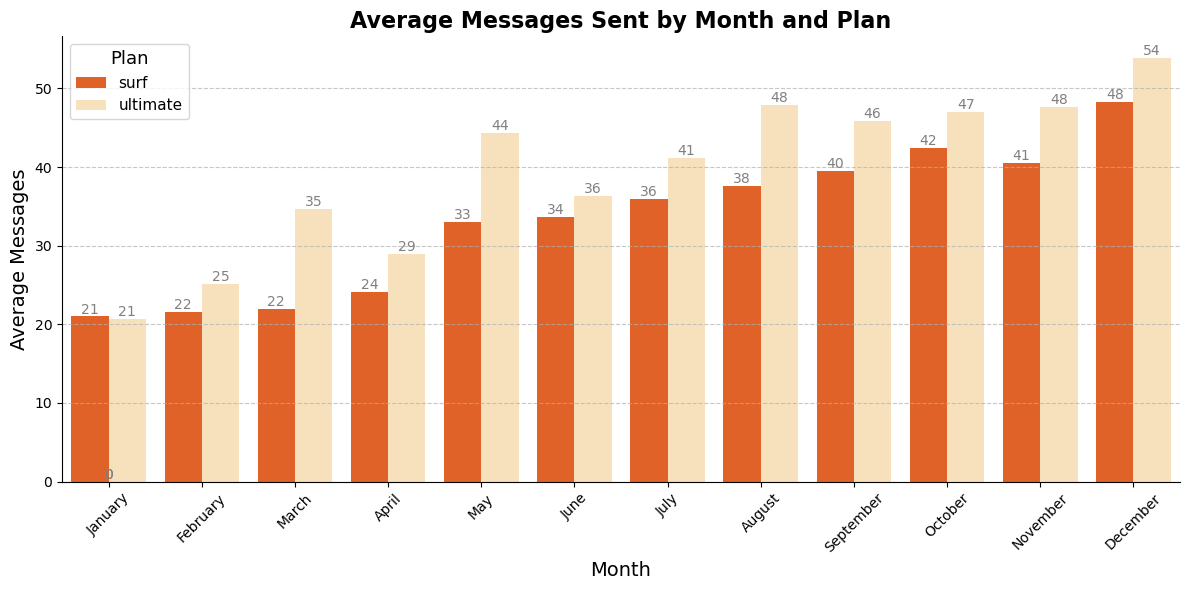

In [119]:
# Calculate the average number of messages for each plan per month
monthly_avg_messages = billing.groupby(['plan', 'month'], observed=False)['message_count'].mean().reset_index()

# Bar plot for average messages by month and plan
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=monthly_avg_messages, x='month', y='message_count', hue='plan', palette=plan_colors)

# Add title and labels
plt.title('Average Messages Sent by Month and Plan', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Messages', fontsize=14)

# Rotate month names for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Plan', title_fontsize='13', fontsize='11')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the average values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='grey', 
                xytext=(0, 5), textcoords='offset points')

# Remove the top and right borders
sns.despine()

# Show plot
plt.tight_layout()
plt.show()


**Analysis of 'Average Messages Sent by Month and Plan'**:

This graph shows the average number of messages sent per month for two different plans: "surf" (orange bars) and "ultimate" (beige bars). Both plans show an overall upward trend throughout the year:

- Lowest usage: January (21 messages for both plans)
- Highest usage: December (48 messages for surf, 54 for ultimate)
- Ultimate plan consistently shows higher message volumes than surf, especially in later months
- Most significant growth occurs between April and August for both plans
- There's a slight plateau/fluctuation in the September-November period before the December peak

---

####  4.2.2.2  Monthly messagae count distribution by plan

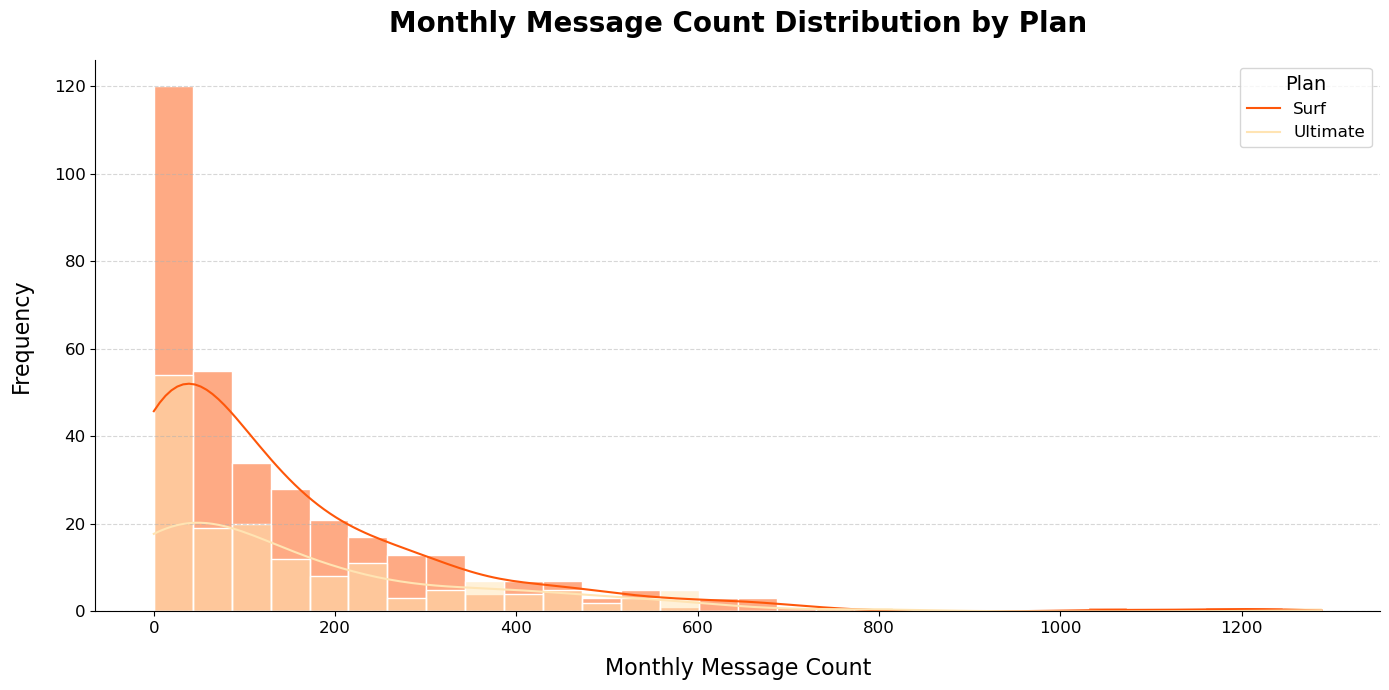

In [120]:
# Grouping by user_id and plan to calculate the total message count per user
monthly_messages_per_user = billing.groupby(['user_id', 'plan'])['message_count'].sum().reset_index()

# Comparative plot of monthly message count by users of each plan
plt.figure(figsize=(14, 7))  # Increased figure size for better readability
sns.histplot(data=monthly_messages_per_user, x='message_count', hue='plan', bins=30, kde=True, palette=plan_colors, edgecolor='white')

# Title and labels
plt.legend(title='Plan', labels=['Surf', 'Ultimate'], title_fontsize=14, fontsize=12, loc='upper right')
plt.title('Monthly Message Count Distribution by Plan', fontsize=20, weight='bold', pad=20)
plt.xlabel('Monthly Message Count', fontsize=16, labelpad=15)
plt.ylabel('Frequency', fontsize=16, labelpad=15)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Lighter gridlines for better focus on data

# Add a border
sns.despine()

plt.tight_layout()
plt.show()



**Analysis of 'Monthly Message Count Distribution by Plan'**:

This histogram shows the distribution of monthly message counts for Surf and Ultimate plans:

- Most users send between 0-200 messages per month
- There's a sharp peak at the low end (0-100 messages), indicating this is the most common usage pattern
- The distribution has a long right tail, meaning some users send many more messages (up to 1200+)
- Ultimate plan (lighter orange) shows slightly higher message counts overall compared to Surf plan (darker orange)
- Both plans follow a similar right-skewed distribution pattern, but decline at different rates

---

####  4.2.2.3 Monthly message count by plan 

In [121]:
# Calculate mean and variance of monthly message counts grouped by plan and month
messages_stats =  billing.groupby(['plan', 'month'], observed=True)['message_count'].describe()
print("Mean and Variance of Monthly Messages by Plan and Month:")
messages_stats

Mean and Variance of Monthly Messages by Plan and Month:


count       mean        std   min    25%   50%    75%  \
plan     month                                                              
surf     January      1.0  21.000000        NaN  21.0  21.00  21.0  21.00   
         February     5.0  21.600000  22.645088   3.0   7.00  11.0  29.00   
         March       16.0  21.937500  18.763329   1.0   6.25  18.5  32.25   
         April       36.0  24.166667  23.109058   1.0   6.75  18.5  34.50   
         May         56.0  33.017857  29.460909   1.0  13.50  26.0  48.00   
         June        73.0  33.616438  30.600758   1.0  10.00  27.0  49.00   
         July        91.0  35.945055  30.132803   1.0  13.50  30.0  50.00   
         August     124.0  37.596774  31.832621   1.0  14.75  31.0  50.00   
         September  151.0  39.523179  30.709137   2.0  17.50  31.0  53.00   
         October    189.0  42.433862  35.135333   2.0  17.00  35.0  57.00   
         November   226.0  40.553097  31.662657   1.0  18.00  33.0  51.50   
         December   254.0  48.326772  36.812090   1.0  24.00  38.0  64.00   
ultimate January      3.0  20.666667  17.616280   2.0  12.50  23.0  30.00   
         February     6.0  25.166667  21.572359   8.0  12.75  19.0  25.25   
         March        7.0  34.714286  24.777102   9.0  18.00  26.0  50.00   
         April       16.0  28.937500  22.646468   5.0  12.50  20.5  34.75   
         May         21.0  44.333333  35.311943   5.0  15.00  35.0  64.00   
         June        38.0  36.289474  28.411939   2.0  15.25  31.0  57.00   
         July        47.0  41.212766  29.293074   1.0  21.50  35.0  56.50   
         August      57.0  47.929825  32.161901   2.0  20.00  42.0  71.00   
         September   71.0  45.901408  30.056212   2.0  25.50  47.0  63.00   
         October     89.0  46.977528  33.151847   2.0  23.00  40.0  65.00   
         November   103.0  47.601942  33.019703   1.0  21.50  41.0  66.50   
         December   126.0  53.936508  37.064861   2.0  24.25  48.5  77.00   

                      max  
plan     month             
surf     January     21.0  
         February    58.0  
         March       59.0  
         April      120.0  
         May        149.0  
         June       133.0  
         July       164.0  
         August     156.0  
         September  153.0  
         October    224.0  
         November   180.0  
         December   266.0  
ultimate January     37.0  
         February    67.0  
         March       72.0  
         April       77.0  
         May        149.0  
         June       143.0  
         July       149.0  
         August     151.0  
         September  155.0  
         October    153.0  
         November   166.0  
         December   150.0

The results show the **monthly distribution** of **message counts** for users in two plans ("surf" and "ultimate"). Here's a direct explanation of the key findings:

**Surf Plan**:
   - **Message count increases** over the months, with a notable jump in December, peaking at **254** messages.
   - **Mean** message count starts low (around 21 in January) and increases, peaking at **48.33** in December.
   - **Variance and Standard Deviation**: There's significant fluctuation in message counts, especially in the months of April and December (higher standard deviations).
   - **Min and Max**: The message count ranges from **1** (in some months) to **266** messages in December.

**Ultimate Plan**:
   - Similar trend, with a gradual increase in message count throughout the year, reaching **126** messages in December.
   - The **mean** message count starts lower (around 20) but increases to **53.94** in December.
   - **Variance and Standard Deviation**: Like the Surf plan, there is noticeable fluctuation in some months, especially with higher peaks in months like December.
   - **Min and Max**: The count starts low (**2** in January) and reaches a maximum of **166** messages in December.

**Key Insights**:
- Both plans show **increased activity** in the second half of the year, especially in December.
- The **Surf plan** has a lower average message count but shows significant variability in certain months.
- The **Ultimate plan** has a higher mean message count and a more consistent trend with some months showing higher values, especially towards the end of the year.

---

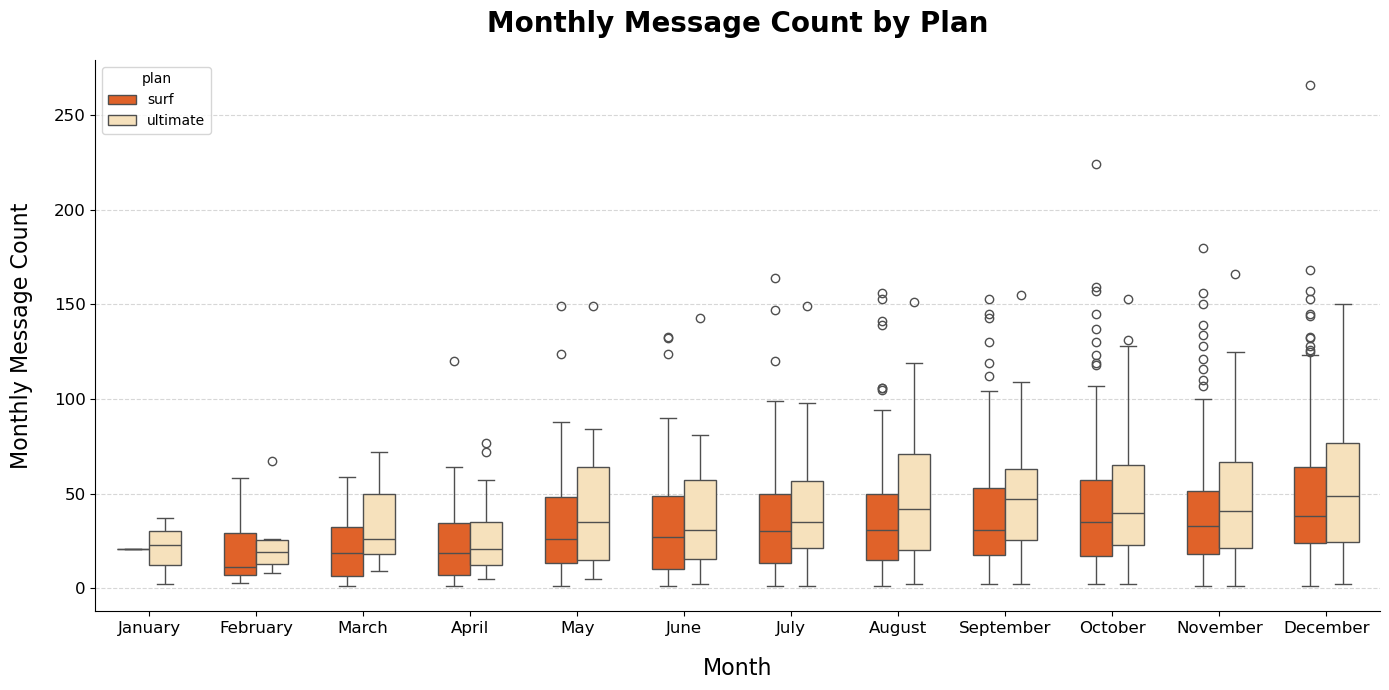

In [220]:
# Plotting a boxplot to visualize the distribution of monthly message count
plt.figure(figsize=(14, 7))  # Adjust figure size for better readability

# Create the boxplot: x = month, y = message_count, hue = plan (to separate by plan)
sns.boxplot(data=billing, x='month', y='message_count', hue='plan', palette=plan_colors, width=0.6)

# Title and labels
plt.title('Monthly Message Count by Plan', fontsize=20, weight='bold', pad=20)
plt.xlabel('Month', fontsize=16, labelpad=15)
plt.ylabel('Monthly Message Count', fontsize=16, labelpad=15)
plt.xticks(fontsize=12)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=12)  # Adjust font size for y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Lighter gridlines for better focus on data

# Add a border
sns.despine()

plt.tight_layout()
plt.show()


**Analysis of 'Monthly Message Count by Plan'**

This box plot shows monthly message counts for Surf and Ultimate plans across the year:

- Both plans show increasing message usage from January to December
- Median values (horizontal line in boxes) gradually increase over months
- Many outliers (circles) appear above boxes, showing some users with very high message counts
- Ultimate plan (beige) generally has higher medians than Surf plan (orange)
- Data spread (box size) increases in later months, showing more variable usage patterns
- Highest outliers reach around 250 messages, while typical usage stays below 100 messages
- December shows the widest range and highest median values for both plans

---

###  4.2.3 Internet

####  4.2.3.1 Average Internet Usage by Month and Plan

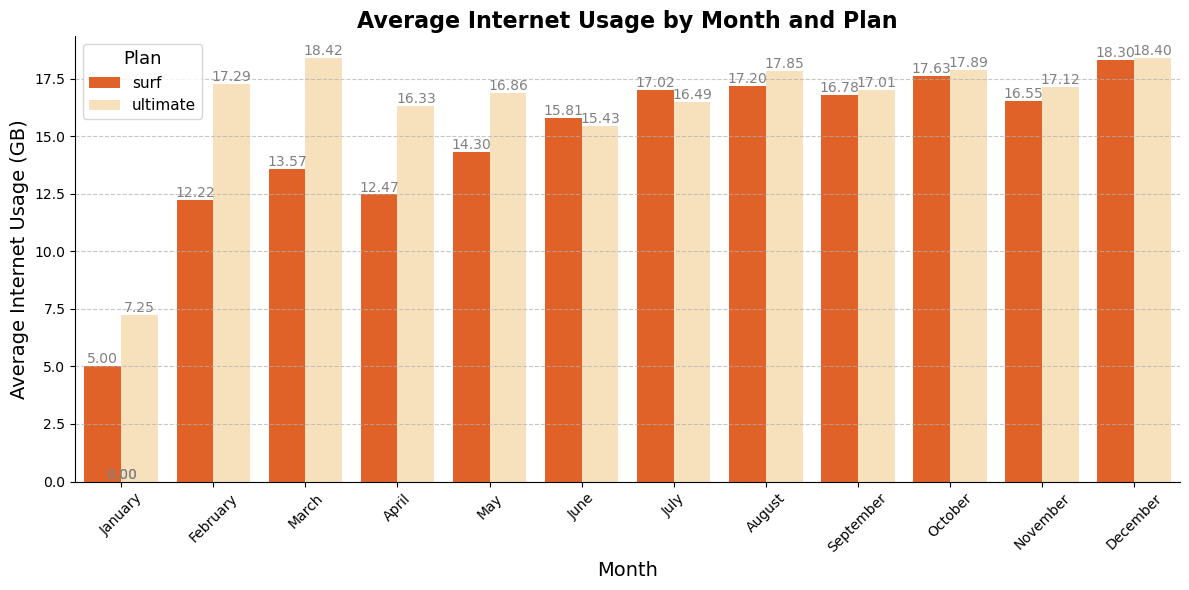

In [123]:
# Calculate the average internet usage (GB used) for each plan per month
monthly_avg_gb_used = billing.groupby(['plan', 'month'], observed=False)['gb_used'].mean().reset_index()

# Bar plot for average internet usage by month and plan
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=monthly_avg_gb_used, x='month', y='gb_used', hue='plan', palette=plan_colors)

# Add title and labels
plt.title('Average Internet Usage by Month and Plan', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Internet Usage (GB)', fontsize=14)

# Rotate month names for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Plan', title_fontsize='13', fontsize='11')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the average values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='grey', 
                xytext=(0, 5), textcoords='offset points')

# Remove the top and right borders
sns.despine()

# Show plot
plt.tight_layout()
plt.show()


**Analysis of 'Average Internet Usage by Month and Plan'**:

This graph shows the average monthly internet usage (in GB) for two different plans - "surf" (orange) and "ultimate" (light beige). 

Both plans show an overall increasing trend throughout the year, with usage starting low in January (surf: 5.00 GB, ultimate: 7.25 GB) and reaching their peaks in December (surf: 18.30 GB, ultimate: 18.40 GB). The "ultimate" plan consistently shows slightly higher usage than the "surf" plan across all months.

#### 4.2.3.2 Monthly Internet Usage Distribution by Pla

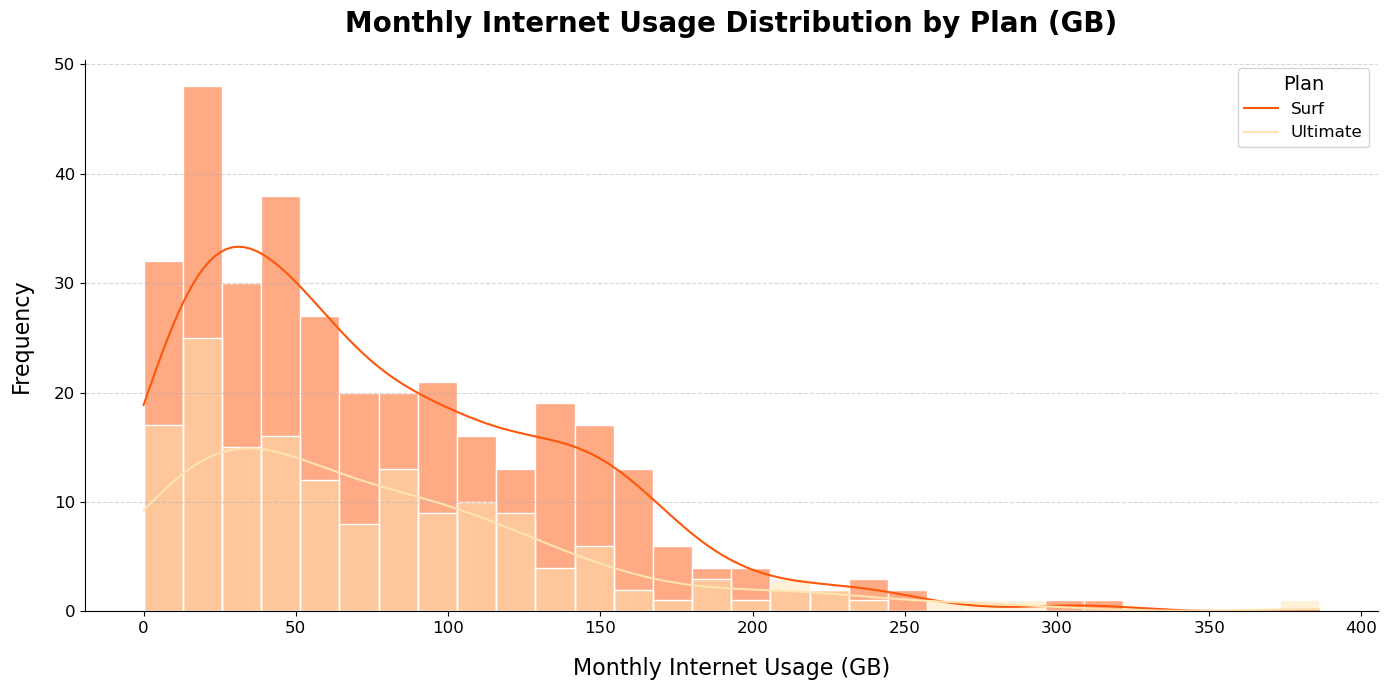

In [124]:
# Grouping by user_id and plan to calculate the total internet usage (GB used) per user
monthly_gb_used_per_user = billing.groupby(['user_id', 'plan'])['gb_used'].sum().reset_index()

# Comparative plot of monthly GB used by users of each plan
plt.figure(figsize=(14, 7))  # Increased figure size for better readability
sns.histplot(data=monthly_gb_used_per_user, x='gb_used', hue='plan', bins=30, kde=True, palette=plan_colors, edgecolor='white')

# Title and labels
plt.legend(title='Plan', labels=['Surf', 'Ultimate'], title_fontsize=14, fontsize=12, loc='upper right')
plt.title('Monthly Internet Usage Distribution by Plan (GB)', fontsize=20, weight='bold', pad=20)
plt.xlabel('Monthly Internet Usage (GB)', fontsize=16, labelpad=15)
plt.ylabel('Frequency', fontsize=16, labelpad=15)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Lighter gridlines for better focus on data

# Add a border
sns.despine()

plt.tight_layout()
plt.show()


**Analysis of 'Monthly Internet Usage Distribution by Plan (GB)'**:

This histogram shows the distribution of monthly internet usage across both plans:

- Most common usage: 0-50 GB per month
- Peak frequency around 25-50 GB
- Long right tail extends to 400 GB
- Surf plan (darker orange) shows higher frequency in lower usage ranges
- Ultimate plan (lighter orange) shows more even distribution
- Very few users exceed 200 GB monthly
- Distribution is right-skewed for both plans
- Frequency drops sharply after 150 GB usage

---

#### 4.2.3.3  Monthly Data Usage by Plan 

In [125]:
# Calculate mean and variance of monthly data usage (GB) grouped by plan and month
gb_usage_stats = billing.groupby(['plan', 'month'], observed=True)['gb_used'].describe()
print("Mean and Variance of Monthly Data Usage by Plan and Month:")
gb_usage_stats

Mean and Variance of Monthly Data Usage by Plan and Month:


count       mean        std  min    25%   50%    75%   max
plan     month                                                                
surf     January      2.0   5.000000   4.242641  2.0   3.50   5.0   6.50   8.0
         February     9.0  12.222222   6.437736  1.0   7.00  12.0  16.00  20.0
         March       23.0  13.565217   7.999012  2.0   6.50  14.0  19.00  30.0
         April       49.0  12.469388   7.362920  1.0   7.00  12.0  18.00  28.0
         May         76.0  14.302632   7.501146  1.0   8.00  14.0  20.00  36.0
         June        95.0  15.810526   6.599959  1.0  13.00  16.0  19.00  37.0
         July       120.0  17.016667   7.718779  1.0  13.00  17.0  21.25  39.0
         August     159.0  17.201258   8.201405  1.0  12.00  17.0  21.00  51.0
         September  193.0  16.777202   6.930992  1.0  13.00  17.0  21.00  37.0
         October    234.0  17.632479   7.586523  1.0  13.00  18.0  21.00  46.0
         November   281.0  16.548043   7.283936  1.0  12.00  17.0  21.00  42.0
         December   317.0  18.296530   8.268846  1.0  14.00  18.0  22.00  70.0
ultimate January      4.0   7.250000   3.862210  2.0   5.75   8.0   9.50  11.0
         February     7.0  17.285714   6.156684  5.0  16.50  20.0  20.50  22.0
         March       12.0  18.416667  11.774073  2.0   8.25  21.0  28.75  36.0
         April       21.0  16.333333   9.264628  3.0   9.00  16.0  21.00  37.0
         May         29.0  16.862069   7.361697  3.0  14.00  17.0  21.00  33.0
         June        47.0  15.425532   8.298100  2.0  10.50  15.0  20.00  38.0
         July        59.0  16.491525   8.015874  1.0  12.00  15.0  21.00  38.0
         August      71.0  17.845070   7.618864  1.0  14.00  18.0  21.00  40.0
         September   86.0  17.011628   6.874495  4.0  13.00  16.5  19.75  37.0
         October    105.0  17.885714   7.216853  4.0  13.00  17.0  21.00  46.0
         November   127.0  17.118110   7.375005  1.0  13.00  17.0  21.00  42.0
         December   151.0  18.397351   7.670793  1.0  14.00  17.0  22.00  46.0

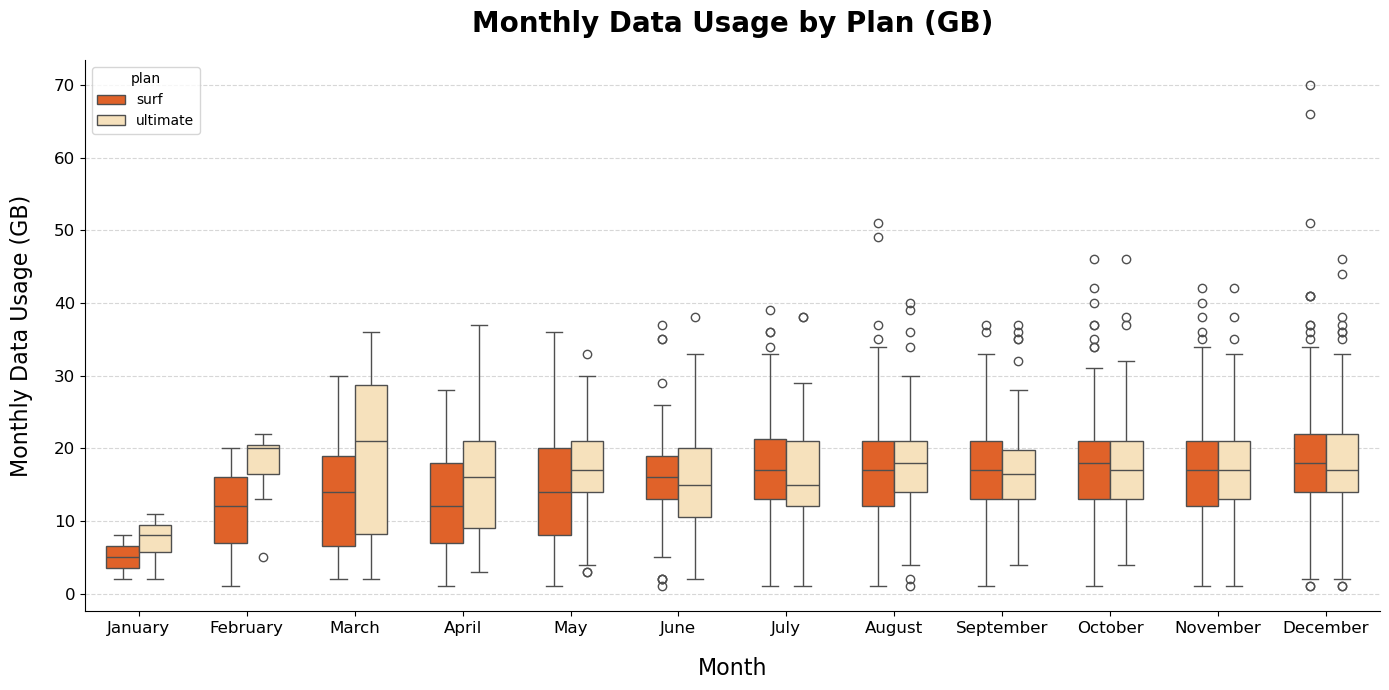

In [126]:
# Plotting a boxplot to visualize the distribution of monthly data usage (GB)
plt.figure(figsize=(14, 7))  # Adjust figure size for better readability

# Create the boxplot: x = month, y = gb_used, hue = plan (to separate by plan)
sns.boxplot(data=billing, x='month', y='gb_used', hue='plan', palette=plan_colors, width=0.6)

# Title and labels
plt.title('Monthly Data Usage by Plan (GB)', fontsize=20, weight='bold', pad=20)
plt.xlabel('Month', fontsize=16, labelpad=15)
plt.ylabel('Monthly Data Usage (GB)', fontsize=16, labelpad=15)
plt.xticks(fontsize=12)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=12)  # Adjust font size for y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Lighter gridlines for better focus on data

# Add a border
sns.despine()

plt.tight_layout()
plt.show()


**Analysis of 'Monthly Data Usage by Plan (GB)'**:

This box plot shows monthly data usage (GB) for both plans:

- Both plans show increasing data usage from January to December
- Starting usage (January):
  - Surf: ~5GB median
  - Ultimate: ~8GB median
- Ending usage (December):
  - Both plans: ~20GB median
- Outliers reach up to 70GB in December
- Usage spread increases over time for both plans
- Ultimate plan shows slightly higher median usage in early months
- By year-end, both plans converge to similar usage patterns
- More extreme outliers appear in later months

---

## 4.3 Revenue

### 4.3.1  Average monthly revenue by plan and month

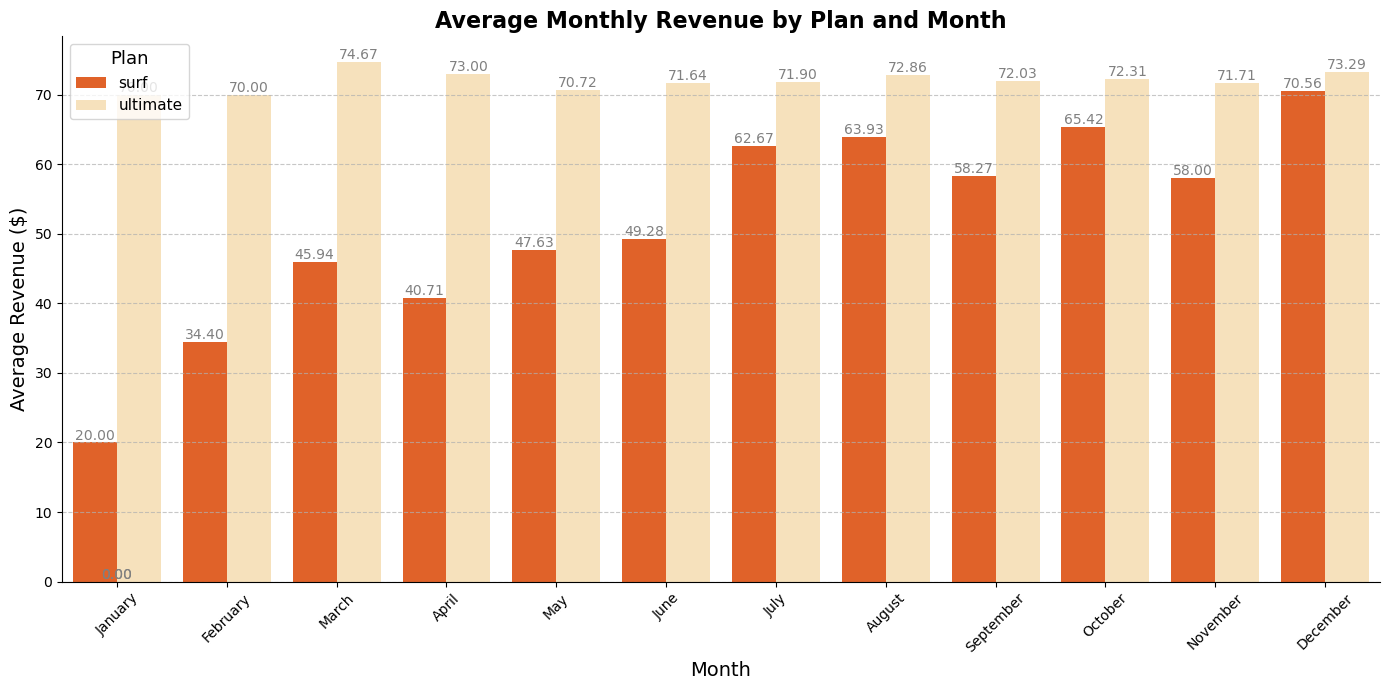

In [127]:
# Calculate the average monthly revenue by plan and month
monthly_avg_revenue = billing.groupby(['plan', 'month'], observed=True)['revenue'].mean().reset_index()
#print("Average Monthly Revenue by Plan and Month:")
#print(monthly_avg_revenue)

# Plotting the average monthly revenue by plan and month
plt.figure(figsize=(14, 7))  # Adjust the figure size for better readability
ax = sns.barplot(data=monthly_avg_revenue, x='month', y='revenue', hue='plan', palette=plan_colors)

# Title and labels
plt.title('Average Monthly Revenue by Plan and Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Revenue ($)', fontsize=14)

# Rotate month names for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Plan', title_fontsize='13', fontsize='11')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='grey', 
                xytext=(0, 5), textcoords='offset points')

# Remove the top and right borders
sns.despine()

# Show plot
plt.tight_layout()
plt.show()



**Analysis of 'Average Monthly Revenue by Plan and Month'**:

This graph shows average monthly revenue for Surf and Ultimate plans:

- Ultimate plan (beige) maintains steady high revenue (70-75 dollars) throughout the year.
- Surf plan (orange) shows significant growth from January (20 dollars) to December (70.56 dollars).
- Highest revenue months:
  - Ultimate: March (74.67 dollars)
  - Surf: December (70.56 dollars)
- Revenue gap between plans narrows significantly by year-end.
- Surf plan shows steady increase until August, then slight fluctuations.
- Ultimate plan maintains relatively stable revenue with minor variations.

---

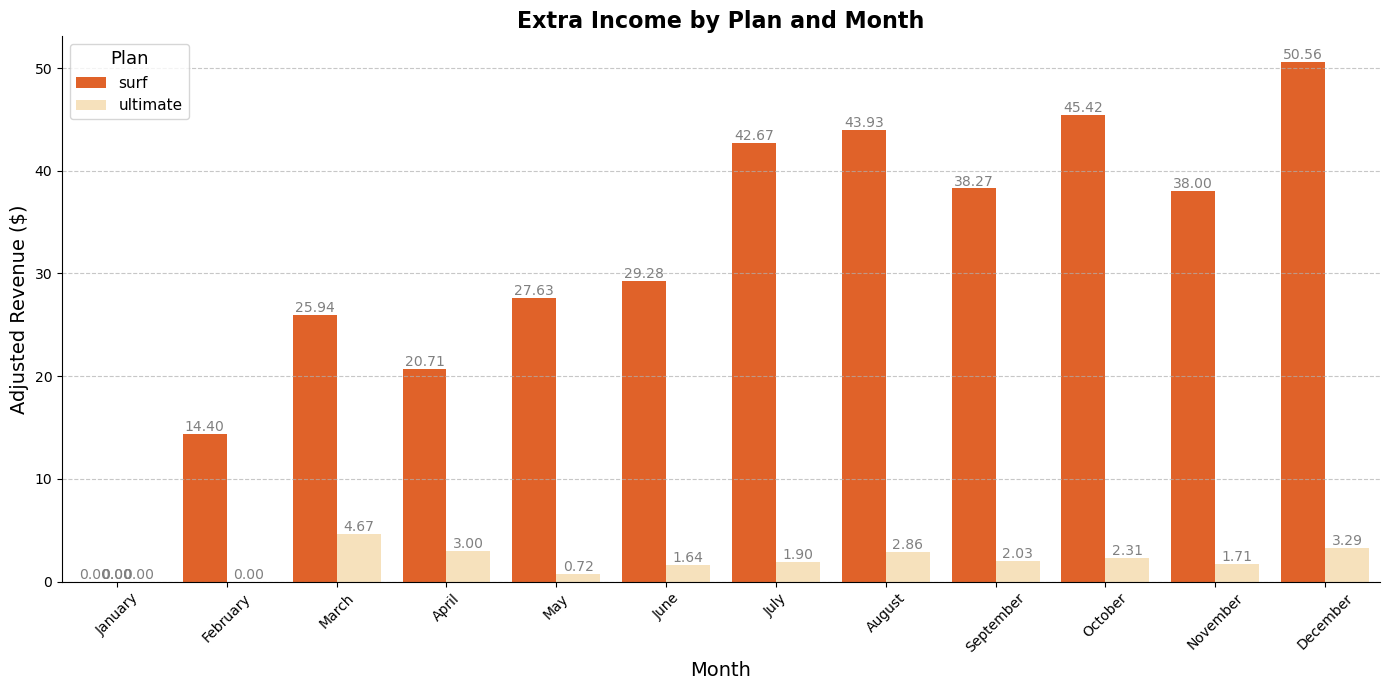

In [222]:
# Calculate the average monthly revenue by plan and month
monthly_avg_revenue = billing.groupby(['plan', 'month'], observed=True)['revenue'].mean().reset_index()

# Adjust the revenue based on the plan
monthly_avg_revenue['adjusted_revenue'] = monthly_avg_revenue.apply(
    lambda row: row['revenue'] - 70 if row['plan'] == 'ultimate' else row['revenue'] - 20 if row['plan'] == 'surf' else row['revenue'],
    axis=1
)

# Plotting the average monthly revenue (only display extra) by plan and month
plt.figure(figsize=(14, 7))  # Adjust the figure size for better readability
ax = sns.barplot(data=monthly_avg_revenue, x='month', y='adjusted_revenue', hue='plan', palette=plan_colors)

# Title and labels
plt.title('Extra Income by Plan and Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Adjusted Revenue ($)', fontsize=14)

# Rotate month names for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Plan', title_fontsize='13', fontsize='11')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='grey', 
                xytext=(0, 5), textcoords='offset points')

# Remove the top and right borders
sns.despine()

# Show plot
plt.tight_layout()
plt.show()


**Analysis of 'Extra Income by Plan and Month'**:

This graph shows extra income generated above the base plan price for both plans:

- Surf plan (orange) shows dramatic growth in extra income:
  - Starts at 0 dollars in January
  - Peaks at 50.56 dollars in December
  - Consistent upward trend throughout the year
- Ultimate plan (beige) shows minimal extra income:
  - Mostly stays below 5 dollars extra per month
  - Highest in March at 4.67 dollars
  - Very stable with slight fluctuations
- Key difference: Surf plan users generate significantly more extra income than Ultimate plan users by year-end.

---

In [129]:
# Grouping by user_id and calculating the mean revenue for each user in the billing DataFrame
surf_data_revenue = billing[billing['plan'] == 'surf'].groupby('user_id')['revenue'].mean()
ultimate_data_revenue = billing[billing['plan'] == 'ultimate'].groupby('user_id')['revenue'].mean()

# Calculate the mean, variance, and standard deviation for the surf plan
surf_mean_revenue = surf_data_revenue.mean()
surf_var_revenue = surf_data_revenue.var()
surf_std_revenue = surf_data_revenue.std()

# Calculate the mean, variance, and standard deviation for the ultimate plan
ultimate_mean_revenue = ultimate_data_revenue.mean()
ultimate_var_revenue = ultimate_data_revenue.var()
ultimate_std_revenue = ultimate_data_revenue.std()

# Print the results
print(f'Mean for the surf plan: {round(surf_mean_revenue,2)}')
print(f'Variance for the surf plan: {round(surf_var_revenue,2)}')
print(f'Standard deviation for the surf plan: {round(surf_std_revenue,2)}')
print(f'Mean for the ultimate plan: {round(ultimate_mean_revenue,2)}')
print(f'Variance for the ultimate plan: {round(ultimate_var_revenue,2)}')
print(f'Standard deviation for the ultimate plan: {round(ultimate_std_revenue,2)}')


Mean for the surf plan: 57.52
Variance for the surf plan: 1889.66
Standard deviation for the surf plan: 43.47
Mean for the ultimate plan: 71.78
Variance for the ultimate plan: 53.83
Standard deviation for the ultimate plan: 7.34


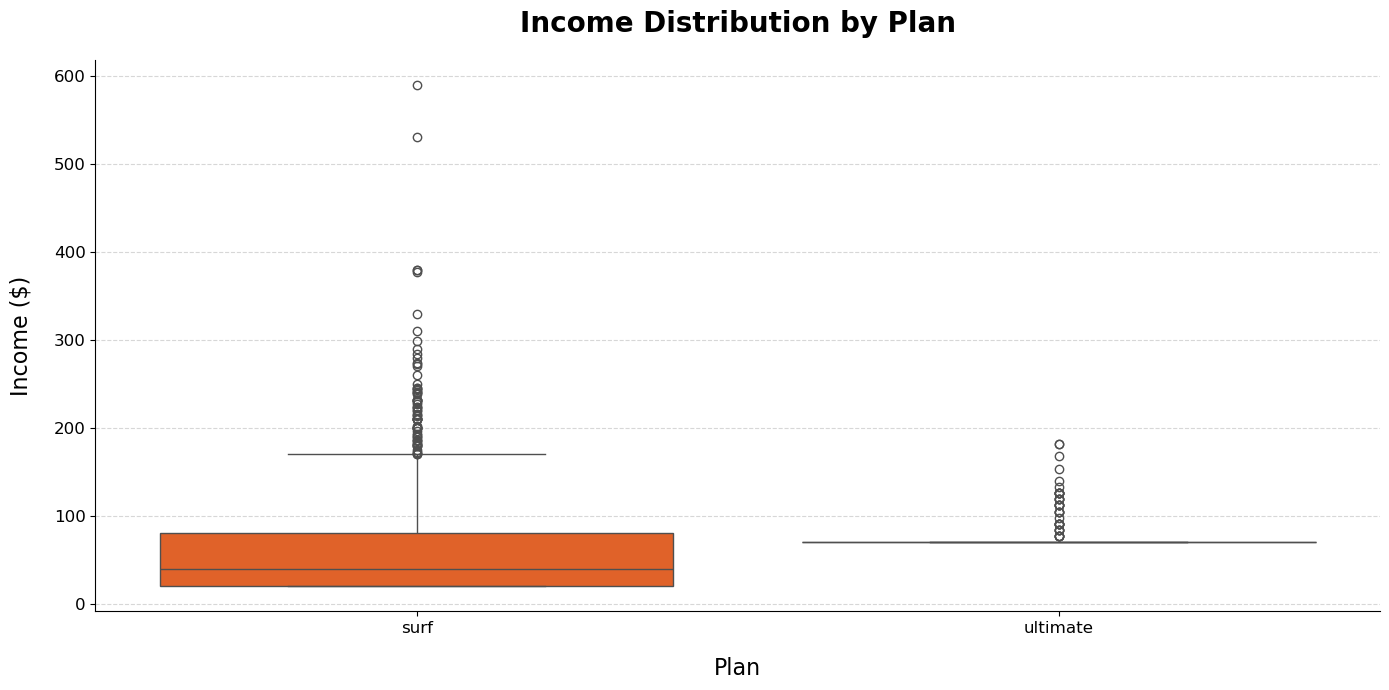

In [130]:
# Plotting a boxplot to visualize the distribution of income (revenue) by plan
plt.figure(figsize=(14, 7))

# Create the boxplot: x = plan, y = revenue
sns.boxplot(data=billing, x='plan', y='revenue', hue='plan', palette=plan_colors)

# Title and labels
plt.title('Income Distribution by Plan', fontsize=20, weight='bold', pad=20)
plt.xlabel('Plan', fontsize=16, labelpad=15)
plt.ylabel('Income ($)', fontsize=16, labelpad=15)

# Adjust font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add a border
sns.despine()

plt.tight_layout()
plt.show()


This box plot compares income distribution between Surf and Ultimate plans:

- Surf plan (orange):
  - Wider income range
  - More outliers reaching up to 600 dollars
  - Higher variability in income
  - Several extreme high-value outliers

- Ultimate plan:
  - More consistent/compressed income distribution
  - Fewer outliers, maxing around 200 dollars
  - Less variability between users
  - Narrower interquartile range

The plot shows Surf plan has potential for higher income but more unpredictability, while Ultimate plan provides more stable, predictable income.

In [131]:
# Filter the billing DataFrame 
df_2018_surf = billing[(billing['plan'] == 'surf') & (billing['month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))]
df_2018_ultimate = billing[(billing['plan'] == 'ultimate') & (billing['month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))]

# Calculate total income for each plan
total_income_surf = df_2018_surf['revenue'].sum()
total_income_ultimate = df_2018_ultimate['revenue'].sum()

# Print the total income for each plan
print('Total Income for 2018 from the Surf plan:', total_income_surf)
print('Total Income for 2018 from the Ultimate plan:', total_income_ultimate)



Total Income for 2018 from the Surf plan: 95491.18
Total Income for 2018 from the Ultimate plan: 52066.0


In [132]:
# Filter the billing DataFrame for the year 2018 and each plan
df_2018_surf_users = billing[(billing['plan'] == 'surf') & (billing['month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))]
df_2018_ultimate_users = billing[(billing['plan'] == 'ultimate') & (billing['month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))]

# Count the unique user IDs for each plan
surf_users_2018 = len(df_2018_surf_users['user_id'].unique())
ultimate_users_2018 = len(df_2018_ultimate_users['user_id'].unique())

# Print the results
print('Users who used the surf plan in 2018:', surf_users_2018)
print('Users who used the ultimate plan in 2018:', ultimate_users_2018)


Users who used the surf plan in 2018: 333
Users who used the ultimate plan in 2018: 157


# 5. Hypothesis testing

In this section, two hypotheses will be statistically tested to validate or refute assumptions about user behavior or income patterns:
- **5.1 Hypothesis on Revenue Differences by Plan Type**: Testing whether the average revenue from users on the Ultimate and Surf plans is significantly different, which could inform pricing or plan improvement strategies.
- **5.2 Hypothesis on Revenue Differences by Region**: Examining if the average revenue from users in the NY-NJ area differs from other regions, which could help with regional marketing strategies or service customization.

---

## 5.1 Hypothesis on Revenue Differences by Plan Type

**Null Hypothesis (H₀):** The average revenue of users on the Ultimate and Surf calling plans is the same.

**Alternative Hypothesis (H₁):** The average revenue of users on the Surf calling plan is different from that of users on the Ultimate calling plan.

---

In [133]:
# Hypothesis test to check if there are differences in average revenue between users of the Ultimate and Surf plans

# Separate revenue by plan
surf_rev = billing[billing['plan'] == 'surf']['revenue']
ultimate_rev = billing[billing['plan'] == 'ultimate']['revenue']

# Significance level
alpha = 0.05 

# Perform Student's t-test
results = st.ttest_ind(ultimate_rev, surf_rev)

# Print p-value and evaluate the hypothesis
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis: there are significant differences in revenue between the plans.")
else:
    print("We do not reject the null hypothesis: there are no significant differences in revenue between the plans.")


p-value: 1.724423314124238e-08
We reject the null hypothesis: there are significant differences in revenue between the plans.


## 5.2 Hypothesis on Revenue Differences by Region

**Null Hypothesis (H₀):** The average revenue of users in the NY-NJ area is the same as that of users in other regions.

**Alternative Hypothesis (H₁):** The average revenue of users in the NY-NJ area is different from that of users in other regions.

In [134]:
# Filter revenue by region
ny_nj_revenue = billing[billing['region'] == 'NY-NJ']['revenue']
other_revenue = billing[billing['region'] == 'others']['revenue']

# Perform the Student's t-test
results = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# Assign the p-value to the variable p_value_region
p_value_region = results.pvalue
print('p-value:', p_value_region)

# Check the p-value against the significance level alpha
alpha = 0.05

if p_value_region < alpha:
    print("We reject the null hypothesis: there are significant differences in revenue between the regions.")
else:
    print("We do not reject the null hypothesis: there are no significant differences in revenue between the regions.")

p-value: 0.12126002617161033
We do not reject the null hypothesis: there are no significant differences in revenue between the regions.


#  6.  Key insight


After analyzing the data, we can conclude that the plan in which users tend to pay more than the established rate is surf.

**The advertising plan could be defined as getting new users for surf and then migrating them to ultimate, an apply this to current users, in order to have a higher overall income**.